In [1]:
# import libraries

import pandas as pd
import requests
import time
from scipy.stats import linregress
from scipy import stats
from matplotlib import pyplot as plt


In [2]:
# read raw csv files
raw_seated_diners = pd.read_csv('input_data/YoY_Seated_Diner_Data.csv')

raw_state_cases = pd.read_csv('input_data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

raw_country_cases = pd.read_csv('input_data/case_daily_trends__united_states.csv',skiprows =3)

raw_country_cases

,Date,New Cases,7-Day Moving Avg
0,Feb 9 2021,91034,107632
1,Feb 8 2021,86706,111329
2,Feb 7 2021,91762,116904
3,Feb 6 2021,107489,119906
4,Feb 5 2021,130261,124773
...,...,...,...
380,Jan 26 2020,3,0
381,Jan 25 2020,0,0
382,Jan 24 2020,1,0
383,Jan 23 2020,0,0


In [3]:
# sort raw country cases to align dates to later merge on index

raw_country_cases['Date'] = pd.to_datetime(raw_country_cases['Date'])

sorted_country_cases = raw_country_cases.sort_values(by = ['Date'], ascending = True)

sorted_country_cases

,Date,New Cases,7-Day Moving Avg
384,2020-01-22,1,0
383,2020-01-23,0,0
382,2020-01-24,1,0
381,2020-01-25,0,0
380,2020-01-26,3,0
...,...,...,...
4,2021-02-05,130261,124773
3,2021-02-06,107489,119906
2,2021-02-07,91762,116904
1,2021-02-08,86706,111329


In [4]:
# drop rows with mismatched dates and reset index

sorted_country_cases.reset_index(inplace=True, drop = True)

slim_country_cases = sorted_country_cases.drop(sorted_country_cases.index[0:27])

slim_country_cases.reset_index(inplace=True, drop = True)

slim_country_cases


,Date,New Cases,7-Day Moving Avg
0,2020-02-18,0,0
1,2020-02-19,0,0
2,2020-02-20,0,0
3,2020-02-21,2,0
4,2020-02-22,0,0
...,...,...,...
353,2021-02-05,130261,124773
354,2021-02-06,107489,119906
355,2021-02-07,91762,116904
356,2021-02-08,86706,111329


In [5]:
# create OpenTable country df
seated_diners_country = raw_seated_diners.loc[raw_seated_diners["Type"]=="country"]

seated_diners_country

,Type,Name,18-Feb,19-Feb,20-Feb,21-Feb,22-Feb,23-Feb,24-Feb,25-Feb,...,31-Jan,1-Feb,2-Feb,3-Feb,4-Feb,5-Feb,6-Feb,7-Feb,8-Feb,9-Feb
0,country,Global,-1.0,3.0,-1.0,-2.0,1.0,4.0,1.0,1.0,...,-36.78,-65.67,-65.19,-61.28,-57.32,-49.00,-47.01,-66.89,-60.98,-62.57
1,country,Australia,-3.0,-6.0,-3.0,-1.0,0.0,0.0,0.0,-2.0,...,83.31,39.50,49.74,61.33,72.21,77.40,95.85,100.09,72.52,56.08
2,country,Canada,-5.0,0.0,-3.0,-2.0,-1.0,8.0,-2.0,-3.0,...,-77.49,-83.83,-85.02,-83.07,-85.27,-79.97,-80.54,-80.18,-72.28,-76.22
3,country,Germany,11.0,4.0,3.0,5.0,1.0,2.0,11.0,4.0,...,-99.62,-99.75,-99.72,-99.67,-99.59,-99.42,-99.19,-99.75,-99.92,-99.48
4,country,Ireland,2.0,0.0,4.0,1.0,-3.0,4.0,-9.0,-8.0,...,-99.84,-100.00,-100.00,-100.00,-99.91,-99.83,-99.16,-99.93,-99.89,-99.98
5,country,Mexico,-5.0,-5.0,-4.0,-3.0,-1.0,2.0,-1.0,-3.0,...,-46.38,-54.53,-61.39,-64.40,-62.66,-57.15,-52.77,-68.10,-60.25,-60.22
6,country,United Kingdom,1.0,-1.0,-2.0,0.0,-1.0,-4.0,-6.0,-5.0,...,-99.76,-99.83,-99.83,-99.90,-99.88,-99.73,-99.63,-99.78,-99.81,-99.80
7,country,United States,0.0,4.0,0.0,-1.0,2.0,6.0,2.0,2.0,...,-23.52,-62.56,-61.23,-56.66,-51.62,-43.02,-41.57,-65.83,-57.92,-59.32


In [6]:
# filter to U.S. only

seated_diners_us = seated_diners_country.loc[seated_diners_country['Name']=='United States']

seated_diners_us_slim = seated_diners_us.drop(columns = ['Type','Name'])

# transpose the df to be joined

flipped_us = seated_diners_us_slim.transpose()

final_us = flipped_us.reset_index()

final_us.rename(columns={'index': 'Date', 7: 'Percent Change in Seated Diners'}, inplace=True)

final_us



,Date,Percent Change in Seated Diners
0,18-Feb,0.00
1,19-Feb,4.00
2,20-Feb,0.00
3,21-Feb,-1.00
4,22-Feb,2.00
...,...,...
353,5-Feb,-43.02
354,6-Feb,-41.57
355,7-Feb,-65.83
356,8-Feb,-57.92


In [7]:
# merge the two data frames by index to line up dates
combined_df = pd.merge(slim_country_cases, final_us, left_index=True, right_index=True, how = 'outer')

combined_df

,Date_x,New Cases,7-Day Moving Avg,Date_y,Percent Change in Seated Diners
0,2020-02-18,0,0,18-Feb,0.00
1,2020-02-19,0,0,19-Feb,4.00
2,2020-02-20,0,0,20-Feb,0.00
3,2020-02-21,2,0,21-Feb,-1.00
4,2020-02-22,0,0,22-Feb,2.00
...,...,...,...,...,...
353,2021-02-05,130261,124773,5-Feb,-43.02
354,2021-02-06,107489,119906,6-Feb,-41.57
355,2021-02-07,91762,116904,7-Feb,-65.83
356,2021-02-08,86706,111329,8-Feb,-57.92


In [8]:
# remove the date_y column (not fomatted as date since year was not included)

slim_combined_df = combined_df.drop(columns=['Date_y'])

slim_combined_df2 = slim_combined_df.rename(columns = {'Date_x': 'Date','7-Day Moving Avg':'7-Day Moving Avg Cases'})

final_combined_df = slim_combined_df2.drop(slim_combined_df2.index[0:12])

final_combined_df.reset_index(inplace=True, drop = True)

final_combined_df

,Date,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners
0,2020-03-01,6,2,2.00
1,2020-03-02,25,6,-7.00
2,2020-03-03,24,9,-9.00
3,2020-03-04,22,12,-5.00
4,2020-03-05,62,21,-5.00
...,...,...,...,...
341,2021-02-05,130261,124773,-43.02
342,2021-02-06,107489,119906,-41.57
343,2021-02-07,91762,116904,-65.83
344,2021-02-08,86706,111329,-57.92


Text(0, 0.5, 'YOY % Change in Seated Diners')

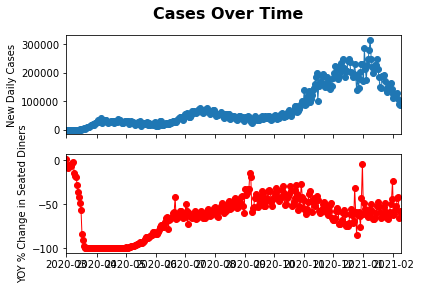

In [9]:
# create variables for data lists
cases = final_combined_df['New Cases']
date =  final_combined_df['Date']
diners = final_combined_df['Percent Change in Seated Diners']

# Generate a facet plot of all 3 figures
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle("Cases Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(date), max(date))
ax1.plot(date, cases, linewidth=1, marker="o")
#ax1.plot(date, vc_fit, "b--", linewidth=1)
ax1.set_ylabel("New Daily Cases")

ax2.plot(date, diners, linewidth=1, marker="o", color="r")
#ax2.plot(year, m_fit, "r--", linewidth=1)
ax2.set_ylabel("YOY % Change in Seated Diners")


In [10]:
# correlation of the national metrics for the entire data set

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(cases, diners)

tot_r

0.1768632532224864

In [14]:
# create measures/columns to show trends for both metrics

trend_df = final_combined_df

daily_change = []

for index,row in trend_df.iterrows():

    if index == 0:

        daily_change.append("")
        
    else:
    
        yesterday = index - 1
    
        iter_value = (trend_df.loc[index, "7-Day Moving Avg Cases"]/trend_df.loc[yesterday, "7-Day Moving Avg Cases"])-1
    
        iter_percent = "{:.2}".format(iter_value)
        
        daily_change.append(iter_percent)   


#daily_change = [[row['Drug Regimen'],row['Tumor Volume (mm3)']] for regimen in select_regimens 
#            for index, row in latest_meas_df.iterrows() 
#            if latest_meas_df.loc[index, "Drug Regimen"] == regimen]

trend_df['Change in 7-Day Moving Avg Cases'] = daily_change

trend_df

,Date,New Cases,7-Day Moving Avg Cases,Percent Change in Seated Diners,Change in 7-Day Moving Avg Cases
0,2020-03-01,6,2,2.00,
1,2020-03-02,25,6,-7.00,2.0
2,2020-03-03,24,9,-9.00,0.5
3,2020-03-04,22,12,-5.00,0.33
4,2020-03-05,62,21,-5.00,0.75
...,...,...,...,...,...
341,2021-02-05,130261,124773,-43.02,-0.038
342,2021-02-06,107489,119906,-41.57,-0.039
343,2021-02-07,91762,116904,-65.83,-0.025
344,2021-02-08,86706,111329,-57.92,-0.048


In [15]:
trend_cases = trend_df['Change in 7-Day Moving Avg Cases']
trend_diners = trend_df['Percent Change in Seated Diners']

tot_slope, tot_int, tot_r, tot_p, tot_std_err = stats.linregress(trend_cases, trend_diners)

tot_r

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# create separate dataframes for separate months

In [ ]:
# create OpenTable states df
seated_diners_states = raw_seated_diners.loc[raw_seated_diners["Type"]=="state"]

seated_diners_states